# France price prediction contest EDA

### Variable description

- annee_naissance - date of birth
- annee_permis - year of permission
- puis_fiscale - power tax
- avc_veh - ???
- kmage_annuel - ежегодный ???
- CRM - ???

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [53]:
# Utils

def barplot_col_vs_all(df, colls_to_build, target_col, target_col_is_y_axis=True, marker='v', alpha=0.2):
    print('Barplots for {}'.format(target_col))
    for col in colls_to_build:
        if col == target_col:
            continue
        print(col)
        if target_col_is_y_axis:
            x_col, y_col = col, target_col
        else:
            x_col, y_col = target_col, col

        plt.scatter(data[x_col], data[y_col], alpha=alpha, marker=marker)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title('{0} vs 1'.format(target_col, col))
        plt.show()

In [5]:
data = pd.read_csv('./data/ech_apprentissage.csv', sep=';', index_col='id', dtype={})
data.head(2)

D:\soft\dev\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2871: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var14,var15,var16,var17,var18,var19,var20,var21,var22,prime_tot_ttc
id,,,,,,,,,,,,,,,,,,,,,
1,1986.0,2006.0,RENAULT,4,1,1034,gpl,2924,68,"enseignant, formateur, chercheur",...,N,1,1,1,27,0,0,0,1,254.75
2,1986.0,2006.0,RENAULT,8,2,1034,gpl,11580,50,"enseignant, formateur, chercheur",...,N,2,1,1,28,0,0,0,1,259.89


In [6]:
data.shape

(300000, 33)

In [7]:
y = data['prime_tot_ttc']
X = data.drop('prime_tot_ttc', axis=1)

## Target variable research

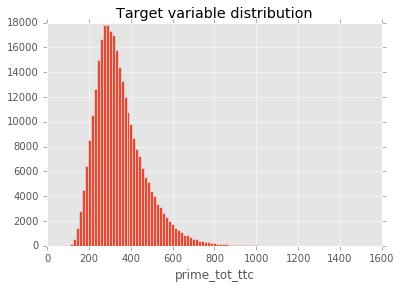

In [8]:
n, bins, patches = plt.hist(y, bins=100)
plt.xlabel('prime_tot_ttc')
plt.title('Target variable distribution')
plt.show()

In [9]:
outstanding_y = sum(y > 1000)
print('Number of items with target variable > 100: {}'.format(outstanding_y))
print('It\'s {}% of the data.'.format(float(outstanding_y) / len(y) * 100))

Number of items with target variable > 100: 176
It's 0.0586666666667% of the data.


### Conclusion

Target variable *prime_tot_ttc* has a very large right tail with a small amount items in it.

**Hypothes 1:** Records with $prime\_toc\_ttc > 1000$ can be removed. It's 176 objects, less then $1\%$ of the data.

## Variables research

In [10]:
X.dtypes

annee_naissance    float64
annee_permis       float64
marque              object
puis_fiscale         int64
anc_veh              int64
codepostal          object
energie_veh         object
kmage_annuel         int64
crm                  int64
profession          object
var1               float64
var2                 int64
var3                 int64
var4                 int64
var5                 int64
var6                object
var7                object
var8                object
var9                 int64
var10                int64
var11                int64
var12                int64
var13                int64
var14               object
var15                int64
var16               object
var17                int64
var18                int64
var19                int64
var20                int64
var21                int64
var22                int64
dtype: object

In [11]:
num_cols = ['annee_naissance', 'annee_permis', 'puis_fiscale', 'anc_veh', 'kmage_annuel', 'crm', 'var1', 'var2', 'var3', \
            'var4', 'var5', 'var9', 'var10', 'var11', 'var12', 'var13', 'var15', 'var17', 'var18', 'var19', 'var20', \
            'var21', 'var22']
cat_cols = ['marque', 'codepostal', 'energie_veh', 'profession', 'var6', 'var7', 'var8', 'var14', 'var16']

## Numerical columns research

In [12]:
X_num = X[num_cols]

In [13]:
X_num.corrwith(y).sort_values()

var5              -0.164251
var1              -0.160806
anc_veh           -0.113175
var11             -0.112625
puis_fiscale      -0.087858
var12             -0.055526
var9              -0.017677
var18             -0.008995
var19             -0.003160
var22             -0.002512
var21              0.000776
var20              0.001241
var17              0.005639
kmage_annuel       0.017368
var15              0.027815
var13              0.051978
var3               0.070001
var2               0.082028
var10              0.095162
var4               0.137481
annee_naissance    0.160273
annee_permis       0.160806
crm                0.672603
dtype: float64

### annee_naissance

In [14]:
def basic_describe_num_variable(df, col_name):
    target_col = X_num[col_name]
    print('>> {0}'.format(col_name).upper())
    print('{} summary:'.format(col_name))
    print(target_col.describe())

    print('\nCount: {}'.format(target_col.count()))

    print('\nHas NaNs:\t{0}\n% of the data:\t{1:.3}%\nnumber of NaNs:\t{2}'.format(target_col.hasnans,
                                                              float(target_col.isnull().sum()) / len(target_col) * 100,
                                                              target_col.isnull().sum()))

    print('\nNumber of unique items: {0}'.format(len(target_col.unique())))
    print('====================\n')

In [15]:
for col in X_num.columns:
    basic_describe_num_variable(X_num, col)

>> ANNEE_NAISSANCE
annee_naissance summary:
count    299710.000000
mean       1983.682506
std           6.568576
min        1925.000000
25%        1980.000000
50%        1985.000000
75%        1989.000000
max        1998.000000
Name: annee_naissance, dtype: float64

Count: 299710

Has NaNs:	True
% of the data:	0.0967%
number of NaNs:	290

Number of unique items: 69

>> ANNEE_PERMIS
annee_permis summary:
count    299710.000000
mean       2003.048210
std           6.595756
min        1944.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        2018.000000
Name: annee_permis, dtype: float64

Count: 299710

Has NaNs:	True
% of the data:	0.0967%
number of NaNs:	290

Number of unique items: 70

>> PUIS_FISCALE
puis_fiscale summary:
count    300000.000000
mean          6.825267
std           2.650280
min           0.000000
25%           5.000000
50%           6.000000
75%           8.000000
max          58.000000
Name: puis_fiscale, dtype: float64

Count: 300000

### Conclusion: numerical variables

(good corr is abs(corr) > 0.08)

Items with NaNs:
*ANNEE_NAISSANCE* and *ANNEE_PERMIS* has small number of NaNs,  has small amount of unique values (70), 
Data type can be set to Int16. Corr: 0.16 very good for both:

*VAR1* has small number of NaNs (290), same as *ANNEE_NAISSANCE* and *ANNEE_PERMIS*, small number of unique(70), corr: -0.160806 very good

Other cols don't contain NaN, a lot of cols have small number of values

Other items:
*PUIS_FISCALE* small amount of uniqe values (51), Data type can be set to float16, corr: -0.087858 good

*ANC_VEH* small amount of unique values (44), Data type can be set to float16, corr: -0.113175 good

*KMAGE_ANNUEL* large amount of unique values (1244), Data type can be set to float32,  corr: 0.017368 bed

*CRM* small number of unique items (149), datatype can be set to float16, corr: 0.67 THE BEST CORR

*VAR2* onlys 6 unique variables, corr: 0.082 good

*VAR3* Only 2 uniqye variables, corr: 0.07 norm

*VAR4* 10 uniqye items

*VAR5* 2 unique items

*VAR9* 335 unique items

*VAR10* 213 uunique items

*VAR11* 44 unique items

Othre variables - same as VAR\*\* variables.

## Categorical cols research

In [16]:
X_cat = X[cat_cols]
X_cat.head(2)

,marque,codepostal,energie_veh,profession,var6,var7,var8,var14,var16
id,,,,,,,,,
1,RENAULT,1034,gpl,"enseignant, formateur, chercheur",A,1,B1,N,1
2,RENAULT,1034,gpl,"enseignant, formateur, chercheur",B,7,H1,N,1


In [17]:
X_cat.describe()

,marque,codepostal,energie_veh,profession,var6,var7,var8,var14,var16
count,300000,300000,300000,300000,300000,300000,300000,300000,300000
unique,155,23711,6,17,5,19,24,8,7
top,RENAULT,6088,gazole,"enseignant, formateur, chercheur",B,1,M1,A,1
freq,73371,2295,165401,110354,115658,153064,91826,62469,157270


In [18]:
print('Nmber of NaNs in categorical variables: ')
X_cat.isnull().sum()

Nmber of NaNs in categorical variables: 


marque         0
codepostal     0
energie_veh    0
profession     0
var6           0
var7           0
var8           0
var14          0
var16          0
dtype: int64

## Conclusion: categorical variables

Categorical variables doesn't contain NaNs.

## Research of the test data

In [19]:
test_data = pd.read_csv('./data/ech_test.csv', sep=';', index_col='id')

In [20]:
test_data['annee_naissance'].describe()

count    29983.000000
mean      1983.709369
std          6.513015
min       1938.000000
25%       1980.000000
50%       1985.000000
75%       1989.000000
max       1996.000000
Name: annee_naissance, dtype: float64

In [21]:
test_data['annee_permis'].describe()

count    29983.000000
mean      2003.077210
std          6.538455
min       1957.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       2016.000000
Name: annee_permis, dtype: float64

In [22]:
test_data_cat = test_data[cat_cols]
test_data_cat.head(2)

,marque,codepostal,energie_veh,profession,var6,var7,var8,var14,var16
id,,,,,,,,,
300001,RENAULT,97109,essence,"enseignant, formateur, chercheur",A,1,B1,N,1
300002,RENAULT,97109,essence,"enseignant, formateur, chercheur",C,1,M1,N,4


In [23]:
test_data.isnull().sum()

annee_naissance    17
annee_permis       17
marque              0
puis_fiscale        0
anc_veh             0
codepostal          0
energie_veh         0
kmage_annuel        0
crm                 0
profession          0
var1               17
var2                0
var3                0
var4                0
var5                0
var6                0
var7                0
var8                0
var9                0
var10               0
var11               0
var12               0
var13               0
var14               0
var15               0
var16               0
var17               0
var18               0
var19               0
var20               0
var21               0
var22               0
dtype: int64

## Conclusion on test data

Test data contains NaNs in var1, annee_naissance, annee_permis .
**Solution**: Set indicator variable for NaNs in this columns and set unique value instead of NaNs in this cols.

## Compare different marque

In [24]:
X['marque'].value_counts()

RENAULT              73371
PEUGEOT              51202
CITROEN              35086
VOLKSWAGEN           20023
OPEL                 13343
FORD                 13135
FIAT                 11316
TOYOTA                8944
MERCEDES              7621
NISSAN                6773
BMW                   6296
AUDI                  5603
SEAT                  4615
VOLVO                 3381
SUZUKI                3205
HONDA                 3144
DACIA                 2446
LAND-ROVER            2340
MITSUBISHI            2332
SKODA                 2224
ALFA ROMEO            2079
HYUNDAI               2034
MAZDA                 1947
MINI                  1689
ROVER                 1579
JEEP                  1356
SAAB                  1343
KIA                   1230
CHRYSLER              1206
LANCIA                1020
                     ...  
NECKAR                   2
OLDSMOBILE               2
MARUTI                   2
SMS                      2
RELIANT                  2
ACMA                     2
S

In [25]:
print('Unique marks: {}'.format(len(X['marque'].unique())))
print('# Maks with < 10 records: {}'.format((X['marque'].value_counts() < 10).sum()))

Unique marks: 155
# Maks with < 10 records: 70


In [26]:
marks_count = X['marque'].value_counts()
rare_marks = marks_count[marks_count < 100]

rare_marks.keys()

data['rare_car'] = data['marque'].apply(lambda it: it in rare_marks)

In [27]:
renault = data[data['marque'] == 'RENAULT']
peugeut = data[data['marque'] == 'PEUGEOT']
citroen = data[data['marque'] == 'CITROEN']
rare_cars = data[data['rare_car']]

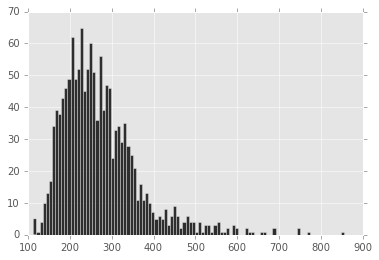

In [28]:
bins = 100
alpha = 0.4

# plt.hist(renault['prime_tot_ttc'], color='green', bins=bins, alpha=alpha)
# plt.hist(peugeut['prime_tot_ttc'], color='red', bins=bins, alpha=alpha)
# plt.hist(citroen['prime_tot_ttc'], color='purple', bins=bins, alpha=alpha)
plt.hist(rare_cars['prime_tot_ttc'], color='black', bins=bins, alpha=2*alpha)
plt.show()

## Conclusion on Car maks:

**TODO: ** Move all rare marques (with < 100 records to separate category)

## Barplots

Barplots for prime_tot_ttc
annee_naissance


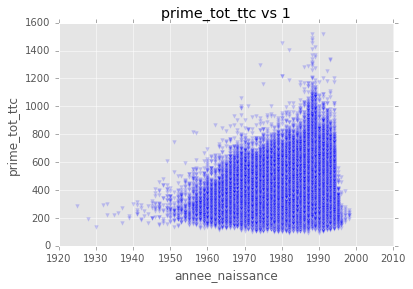

annee_permis


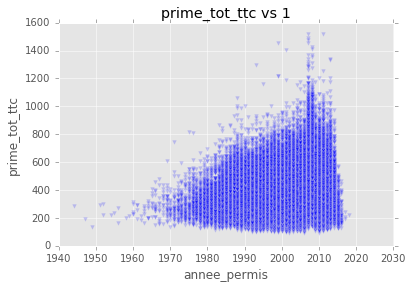

puis_fiscale


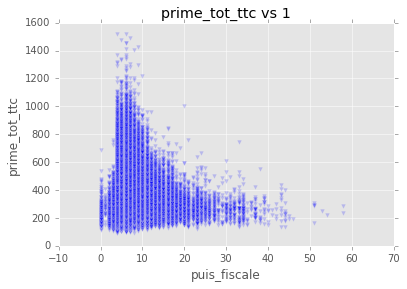

anc_veh


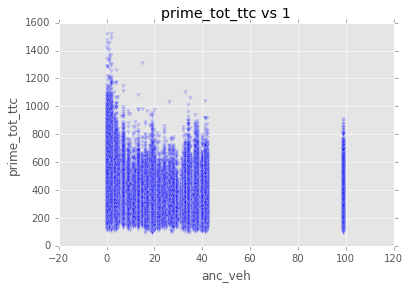

kmage_annuel


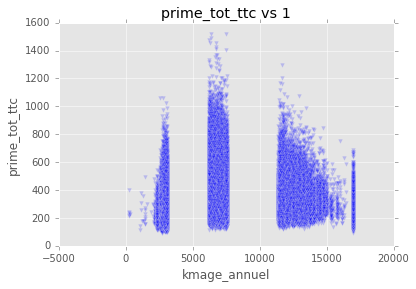

crm


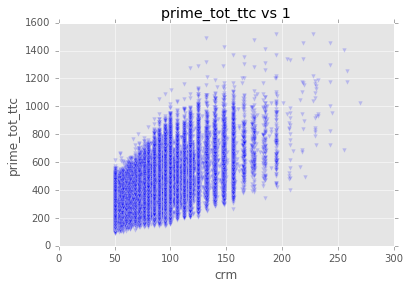

var1


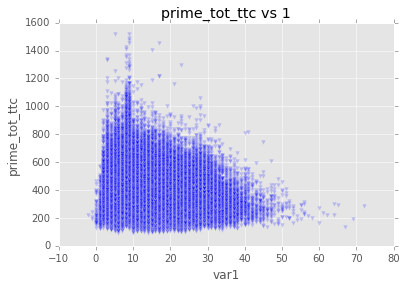

var2


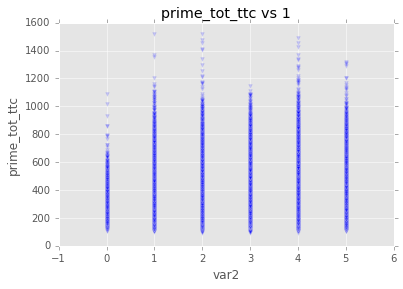

var3


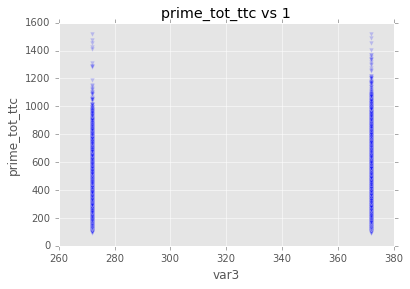

var4


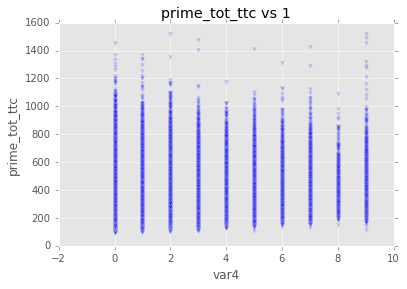

var5


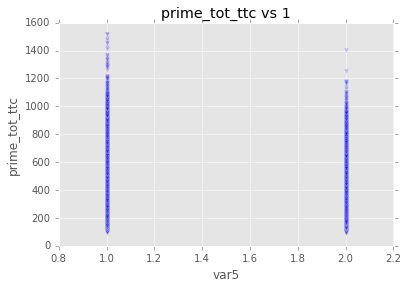

var9


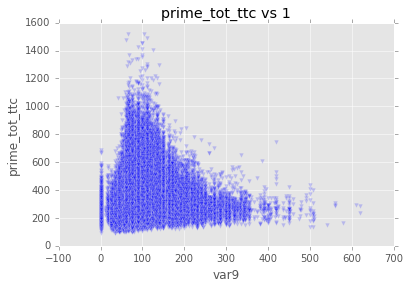

var10


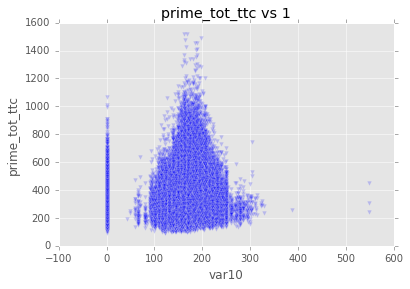

var11


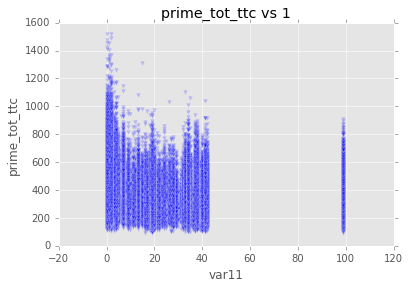

var12


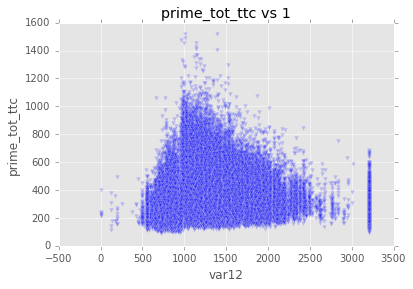

var13


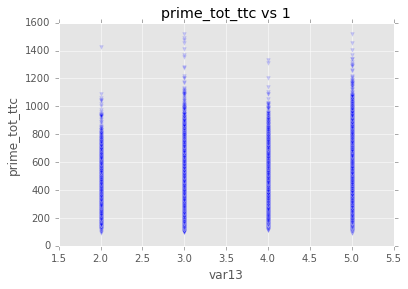

var15


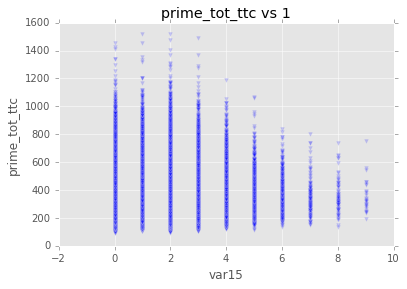

var17


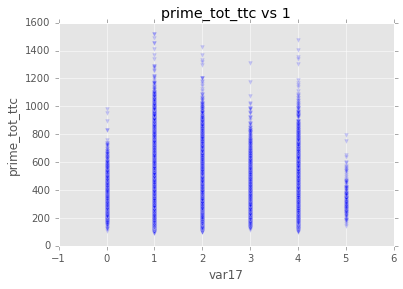

var18


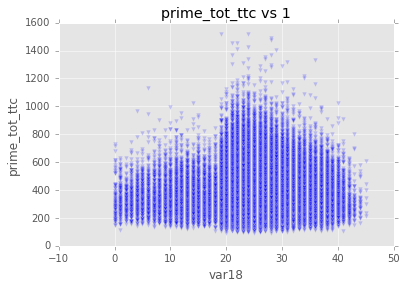

var19


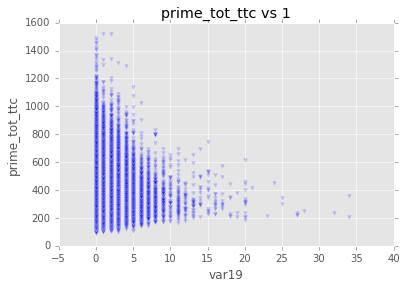

var20


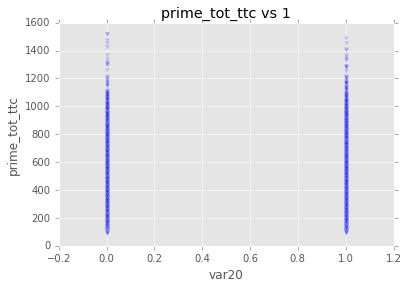

var21


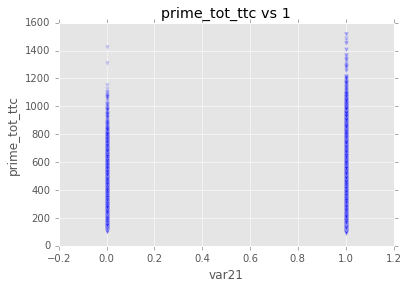

var22


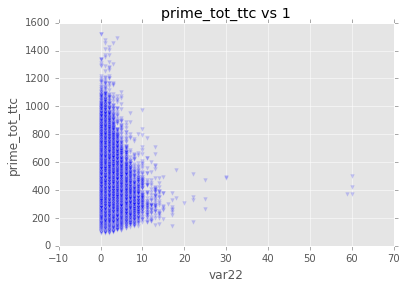

In [55]:
# barplots target variable ('prime_tot_ttc')
barplot_col_vs_all(data, num_cols, 'prime_tot_ttc')

Barplots for crm
annee_naissance


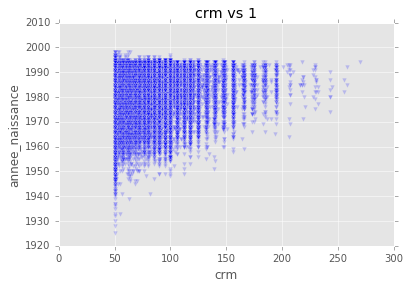

annee_permis


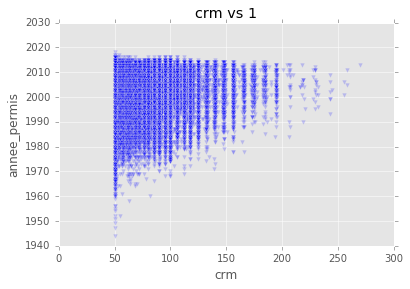

puis_fiscale


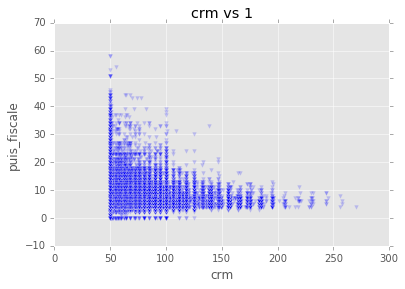

anc_veh


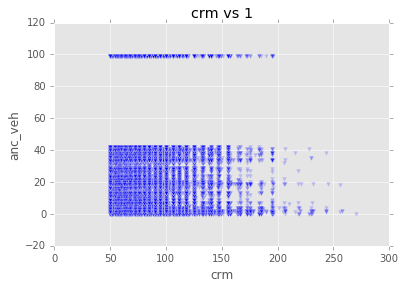

kmage_annuel


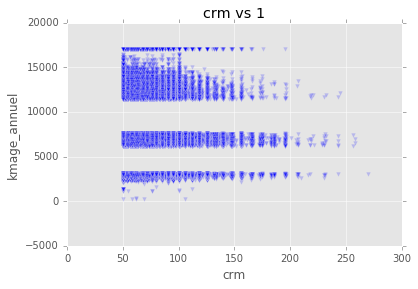

var1


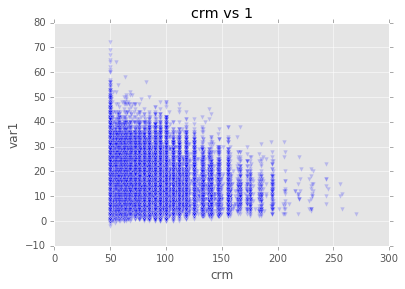

var2


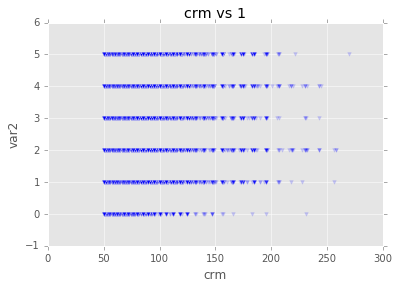

var3


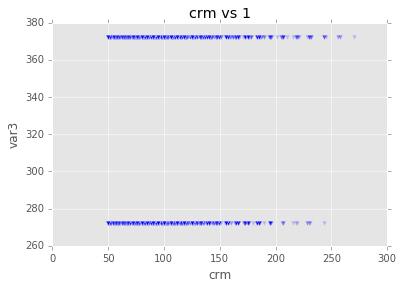

var4


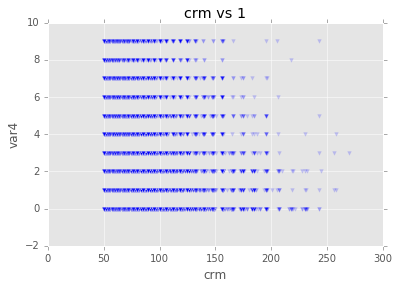

var5


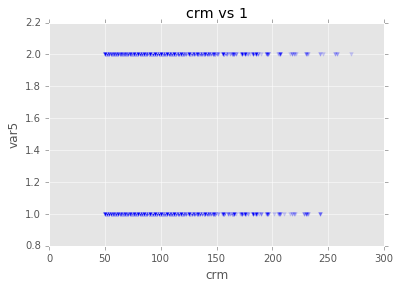

var9


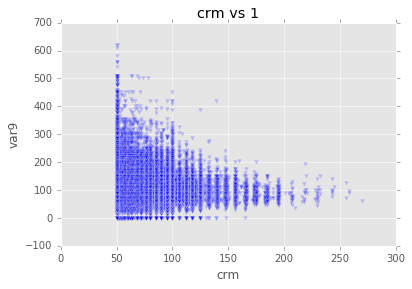

var10


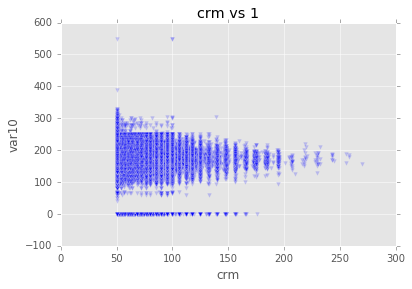

var11


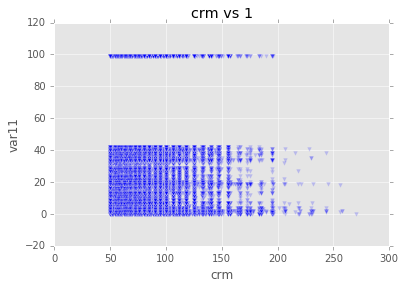

var12


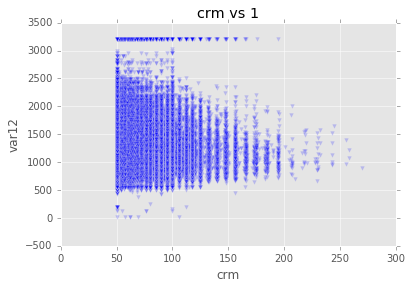

var13


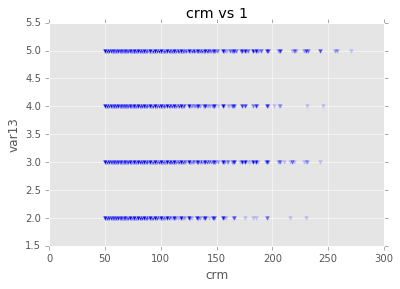

var15


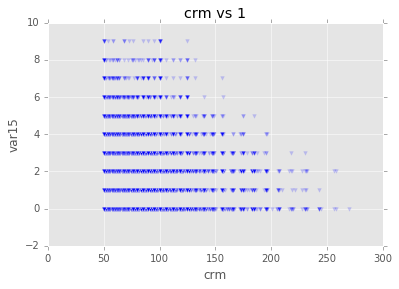

var17


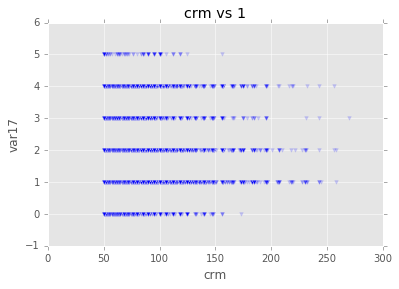

var18


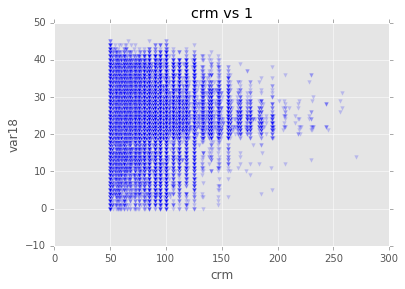

var19


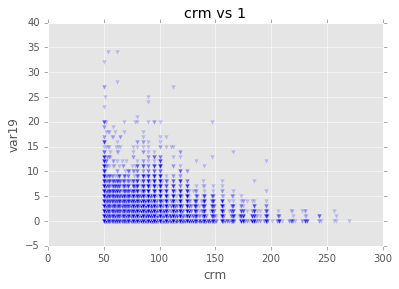

var20


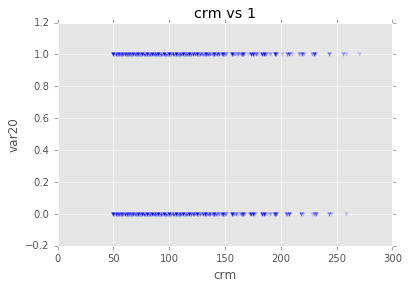

var21


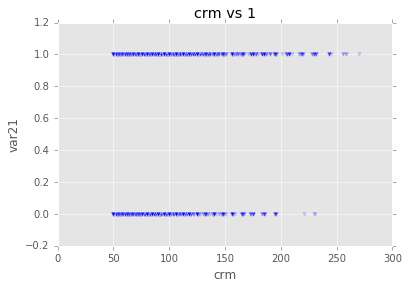

var22


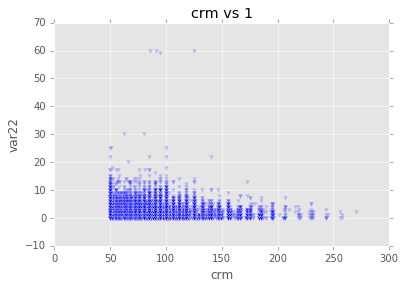

In [56]:
# Barplots crm
barplot_col_vs_all(data, num_cols, 'crm', target_col_is_y_axis=False)

Barplots for puis_fiscale
annee_naissance


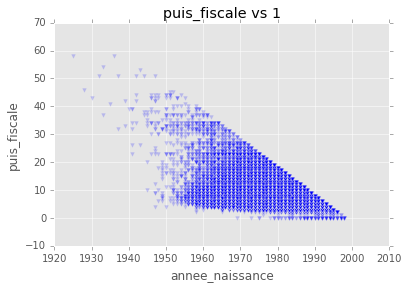

annee_permis


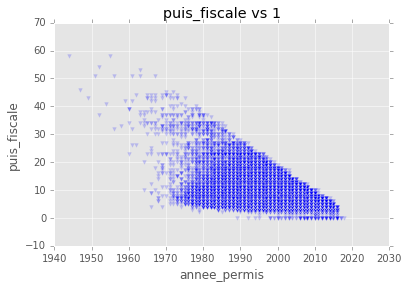

anc_veh


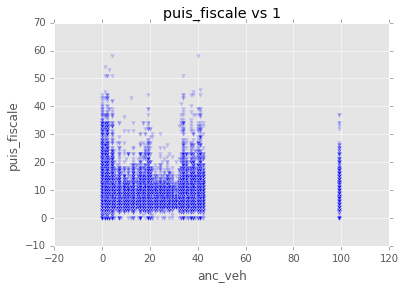

kmage_annuel


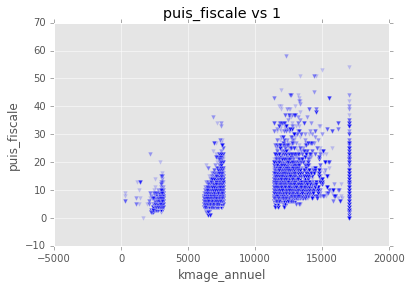

crm


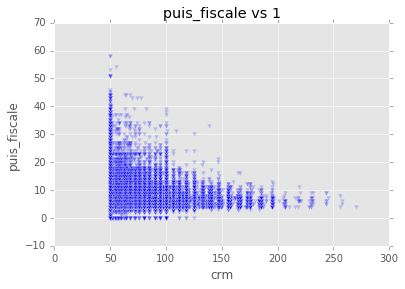

var1


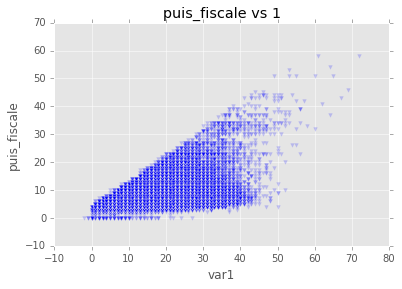

var2


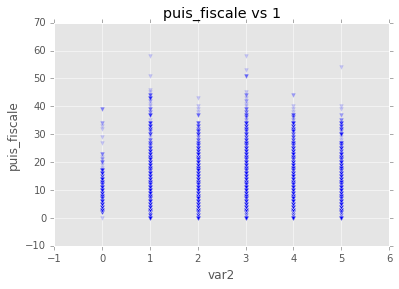

var3


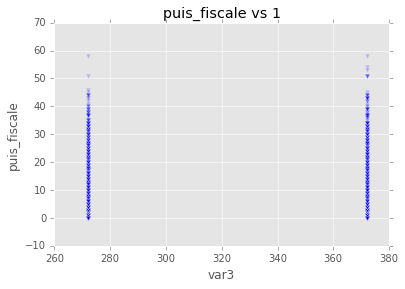

var4


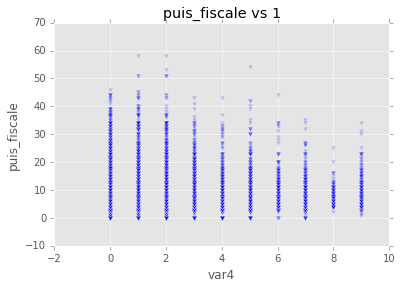

var5


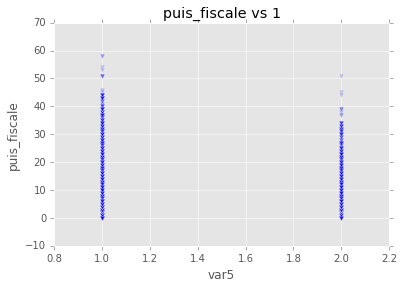

var9


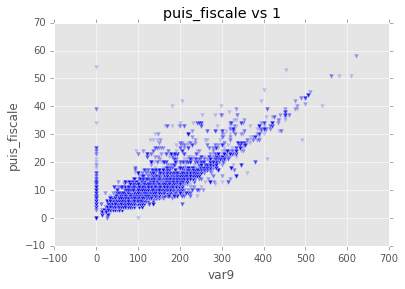

var10


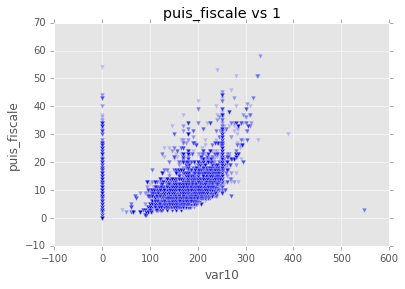

var11


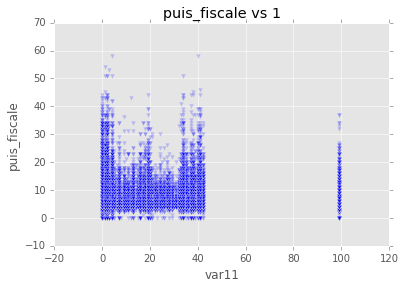

var12


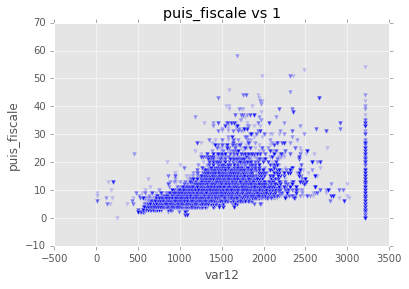

var13


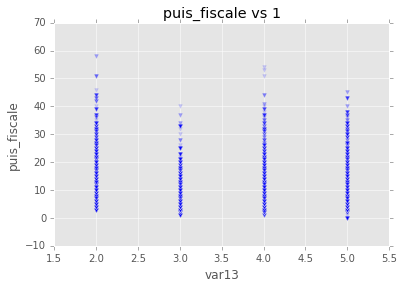

var15


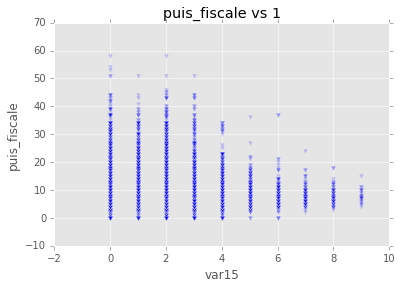

var17


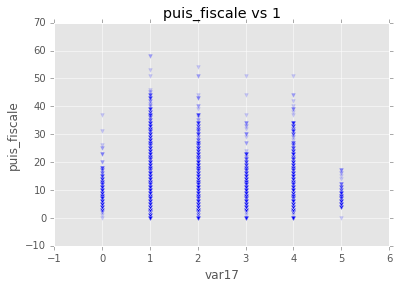

var18


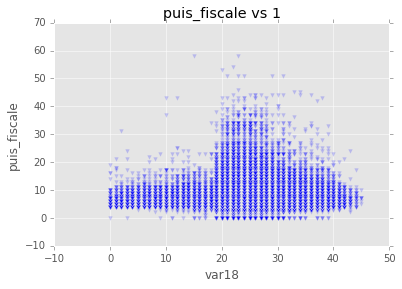

var19


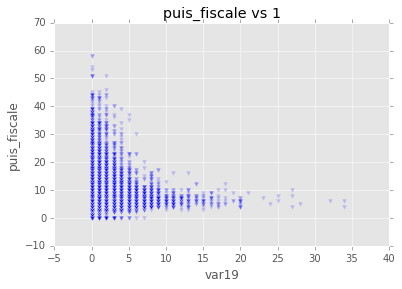

var20


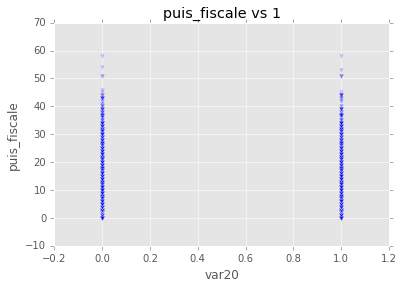

var21


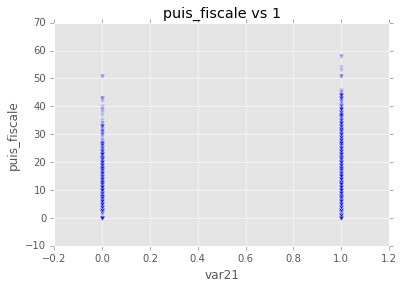

var22


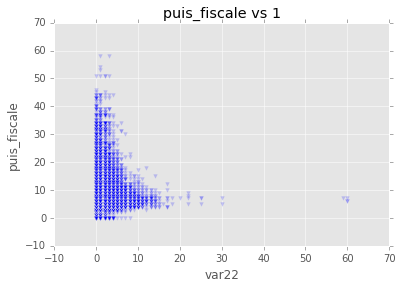

In [57]:
barplot_col_vs_all(data, num_cols, 'puis_fiscale')

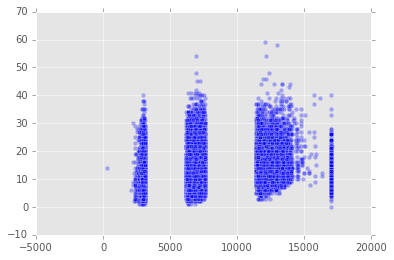

In [33]:
# Strange stripes in kmage_annuel
plt.scatter(test_data['kmage_annuel'], test_data['var1'], alpha=0.3)

In [35]:
# Engine types
data['energie_veh'].value_counts()

gazole             165401
essence            126025
gpl                  7058
hybride essence       803
NR                    413
electricite           300
Name: energie_veh, dtype: int64

In [39]:
reliant = data[data['marque']=='RELIANT']
for col in reliant.columns:
    print('{0}\t\t: {1}'.format(col, reliant[col][133047]))

# this car: https://en.wikipedia.org/wiki/Reliant_Scimitar_SS1

annee_naissance		: 1984.0
annee_permis		: 2003.0
marque		: RELIANT
puis_fiscale		: 9
anc_veh		: 0
codepostal		: 41106
energie_veh		: essence
kmage_annuel		: 2896
crm		: 50
profession		: cadre, ingenieur
var1		: 13.0
var2		: 3
var3		: 272
var4		: 2
var5		: 1
var6		: B
var7		: 2
var8		: M2
var9		: 135
var10		: 0
var11		: 0
var12		: 839
var13		: 2
var14		: F
var15		: 2
var16		: 1
var17		: 1
var18		: 24
var19		: 1
var20		: 1
var21		: 1
var22		: 0
prime_tot_ttc		: 281.75
rare_car		: True


In [41]:
amprichar = data[data['marque']=='AMPHICAR']
for col in reliant.columns:
    print('{0}\t\t: {1}'.format(col, ampichar[col][112862]))

# this car: https://en.wikipedia.org/wiki/Amphicar

annee_naissance		: 1985.0
annee_permis		: 2004.0
marque		: AMPHICAR
puis_fiscale		: 7
anc_veh		: 0
codepostal		: 35129
energie_veh		: essence
kmage_annuel		: 6480
crm		: 50
profession		: agent, employe
var1		: 12.0
var2		: 4
var3		: 272
var4		: 2
var5		: 1
var6		: B
var7		: 1
var8		: M1
var9		: 38
var10		: 120
var11		: 0
var12		: 1050
var13		: 2
var14		: F
var15		: 3
var16		: 1
var17		: 1
var18		: 28
var19		: 0
var20		: 1
var21		: 1
var22		: 1
prime_tot_ttc		: 290.08
rare_car		: True


In [43]:
np.corrcoef(X['var10'], X['var12'])

array([[ 1.        , -0.18502113],
       [-0.18502113,  1.        ]])

annee_naissance


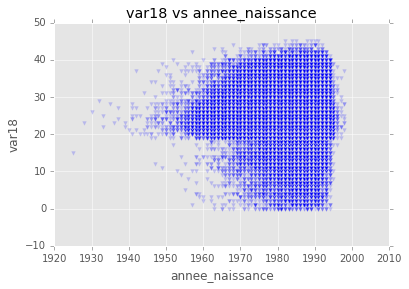

annee_permis


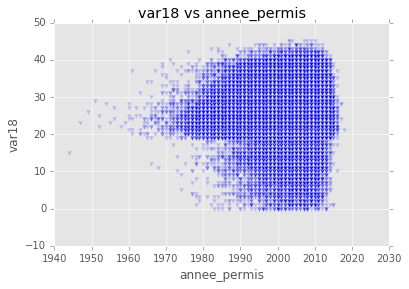

puis_fiscale


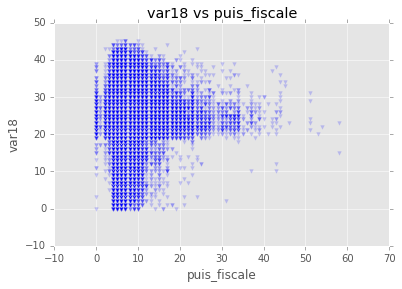

anc_veh


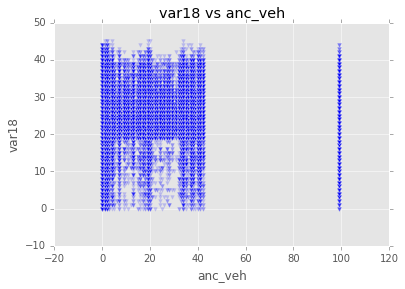

kmage_annuel


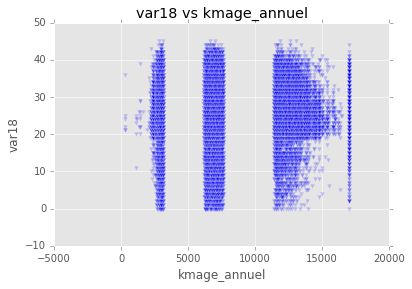

crm


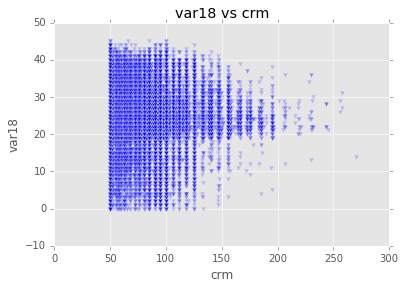

var1


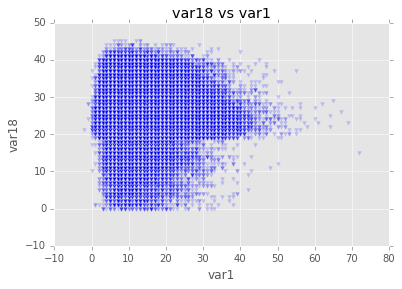

var2


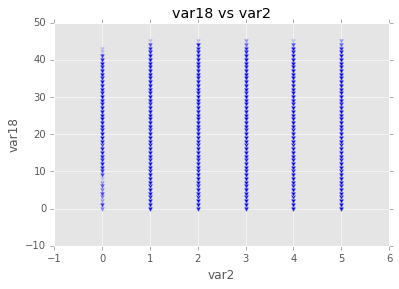

var3


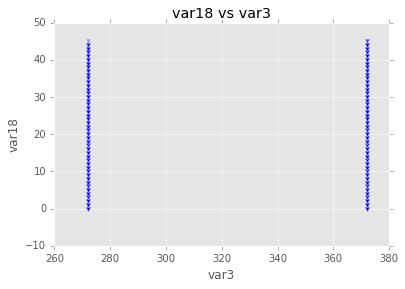

var4


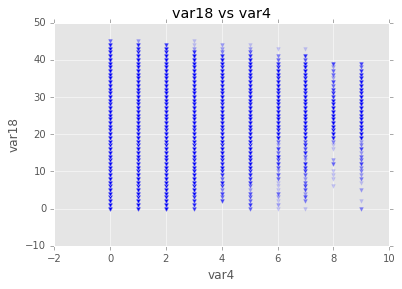

var5


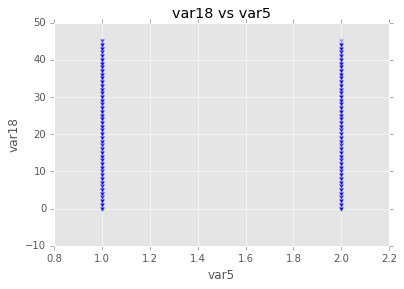

var9


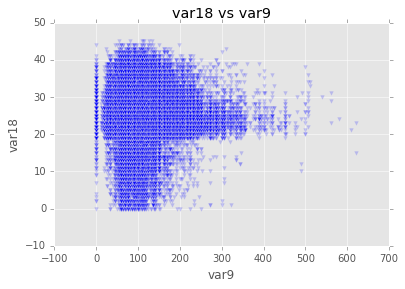

var10


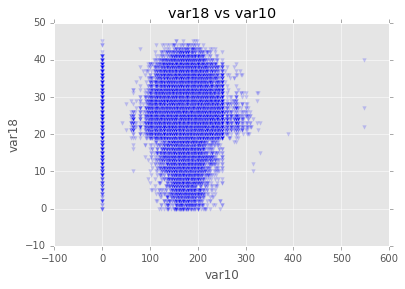

var11


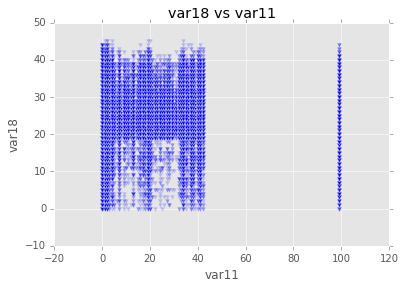

var12


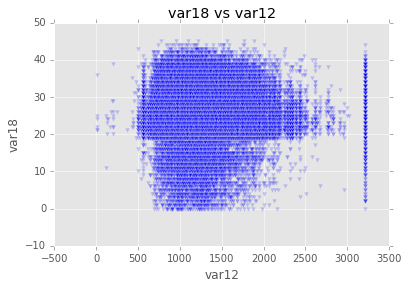

var13


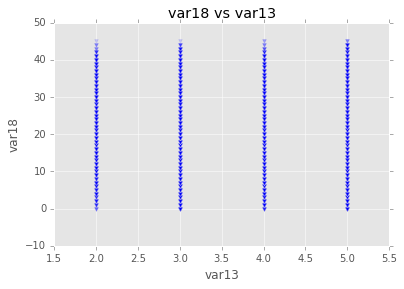

var15


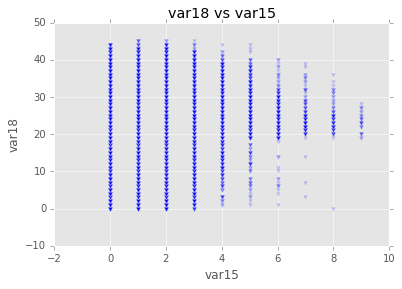

var17


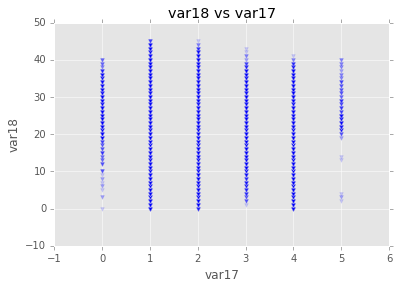

var18


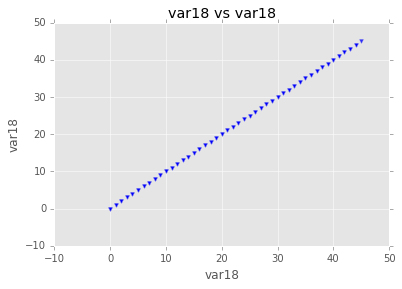

var19


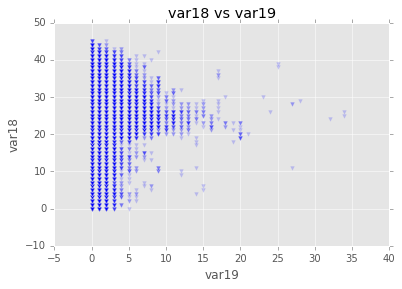

var20


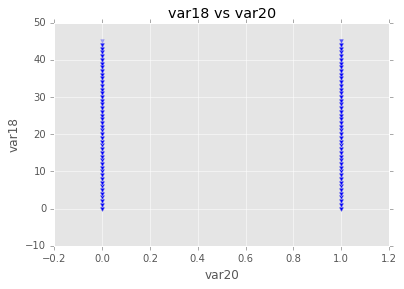

var21


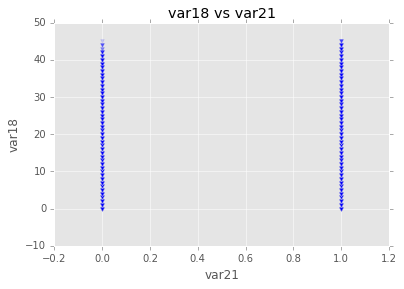

var22


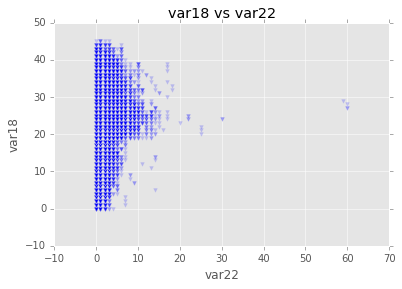

In [44]:
for col in num_cols:
    print(col)
    plt.scatter(data[col], data['var18'], alpha=0.2,
               marker='v')
    plt.ylabel('var18')
    plt.xlabel(col)
    plt.title('var18 vs {}'.format(col))
    plt.show()

In [45]:
reliant = data[data['marque']=='NECKAR']


for col in reliant.columns:
    print('{0}\t\t: {1}'.format(col, reliant[col]))

annee_naissance		: id
266994    1995.0
266995    1992.0
Name: annee_naissance, dtype: float64
annee_permis		: id
266994    2015.0
266995    2011.0
Name: annee_permis, dtype: float64
marque		: id
266994    NECKAR
266995    NECKAR
Name: marque, dtype: object
puis_fiscale		: id
266994    3
266995    3
Name: puis_fiscale, dtype: int64
anc_veh		: id
266994    0
266995    0
Name: anc_veh, dtype: int64
codepostal		: id
266994    89055
266995    89055
Name: codepostal, dtype: object
energie_veh		: id
266994    essence
266995    essence
Name: energie_veh, dtype: object
kmage_annuel		: id
266994    17000
266995    17000
Name: kmage_annuel, dtype: int64
crm		: id
266994    58
266995    58
Name: crm, dtype: int64
profession		: id
266994    ouvrier
266995    ouvrier
Name: profession, dtype: object
var1		: id
266994    1.0
266995    5.0
Name: var1, dtype: float64
var2		: id
266994    3
266995    3
Name: var2, dtype: int64
var3		: id
266994    272
266995    272
Name: var3, dtype: int64
var4		: id
266

In [46]:
# Why 372 and 272 for var3? What is this magic numbers?
X['var3'].value_counts()

372    169434
272    130566
Name: var3, dtype: int64

## Conclusion

- **var9** - bhp (horse powers)
- **var12** - weight of empty car
- **var13** - number of doors, not sure

**TODO**: Add indicator variable for each deafault value in columns. (default variables are stripes in 0, 100 ect.)

## Post code research